# 📊 Portfolio Simulation with Pandas and yFinance

This notebook demonstrates how to use Python to:

- Download historical stock data using `yfinance`
- Calculate portfolio returns and risk metrics
- Simulate many random portfolios
- Identify the market portfolio using the Sharpe ratio
- Compare individual stock performance to the market using regression

Let’s get started!

## 🗃️ Step 1: Download Stock Data

We'll use `yfinance` to download daily **adjusted close prices** for several major stocks between 2014 and 2018.


In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-v0_8")
# Load the stocks
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT"]
stocks = yf.download(ticker, start = "2014-01-01", end = "2018-12-31", auto_adjust=False)
close = stocks.loc[:, "Close"].copy()
# Example how to save to csv
#stocks.to_csv("stocks.csv")
#stocks = pd.read_csv("stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0])
#stocks.columns = stocks.columns.to_flat_index()
#stocks.head()

[*********************100%***********************]  6 of 6 completed


### Displaying some information from uploaded stocks

In [2]:
stocks.head()

Price       Adj Close                                                \
Ticker           AAPL          BA        DIS         IBM         KO   
Date                                                                  
2014-01-02  17.192825  116.807953  69.041542  111.020966  28.312571   
2014-01-03  16.815166  117.619873  68.896713  111.685135  28.173317   
2014-01-06  16.906866  118.295097  68.634193  111.302216  28.041012   
2014-01-07  16.785948  120.089867  69.104912  113.522270  28.124567   
2014-01-08  16.892250  120.354843  68.091049  112.481049  27.811224   

Price                      Close                                     ...  \
Ticker           MSFT       AAPL          BA        DIS         IBM  ...   
Date                                                                 ...   
2014-01-02  30.939625  19.754642  136.669998  76.269997  177.370941  ...   
2014-01-03  30.731457  19.320715  137.619995  76.110001  178.432129  ...   
2014-01-06  30.082037  19.426071  138.410004  75.820000  177.820267  ...   
2014-01-07  30.315166  19.287144  140.509995  76.339996  181.367111  ...   
2014-01-08  29.773968  19.409286  140.820007  75.220001  179.703629  ...   

Price            Open                                       Volume           \
Ticker            DIS         IBM         KO       MSFT       AAPL       BA   
Date                                                                          
2014-01-02  76.040001  178.977051  41.119999  37.349998  234684800  3366700   
2014-01-03  76.300003  177.657745  40.680000  37.200001  392467600  3177400   
2014-01-06  76.529999  178.919693  40.480000  36.849998  412610800  4196500   
2014-01-07  76.120003  178.193115  40.480000  36.330002  317209200  4238500   
2014-01-08  76.129997  181.003830  40.439999  36.000000  258529600  4236100   

Price                                              
Ticker           DIS      IBM        KO      MSFT  
Date                                               
2014-01-02   5200900  4755639  12698600  30632200  
2014-01-03   4060700  4250107  10403400  31134800  
2014-01-06   6816200  4254919  11036300  43603700  
2014-01-07   4494900  6205186  11872300  35802800  
2014-01-08  10900300  4815470  15339600  59971700  

[5 rows x 36 columns]

In [3]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288 entries, 2010-01-04 to 2019-02-05
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2288 non-null   float64
 1   (Adj Close, BA)    2288 non-null   float64
 2   (Adj Close, DIS)   2288 non-null   float64
 3   (Adj Close, IBM)   2288 non-null   float64
 4   (Adj Close, KO)    2288 non-null   float64
 5   (Adj Close, MSFT)  2288 non-null   float64
 6   (Close, AAPL)      2288 non-null   float64
 7   (Close, BA)        2288 non-null   float64
 8   (Close, DIS)       2288 non-null   float64
 9   (Close, IBM)       2288 non-null   float64
 10  (Close, KO)        2288 non-null   float64
 11  (Close, MSFT)      2288 non-null   float64
 12  (High, AAPL)       2288 non-null   float64
 13  (High, BA)         2288 non-null   float64
 14  (High, DIS)        2288 non-null   float64
 15  (High, IBM)        2288 non-null   float64
 16  (High,

In [4]:
close.head()

Ticker,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,7.643214,56.180000,32.070000,126.625237,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.990000,125.095604,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.820000,124.282982,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.830000,123.852776,28.094999,30.450001
2010-01-08,7.570714,61.599998,31.879999,125.095604,27.575001,30.660000


### Illustration of the stock evolution

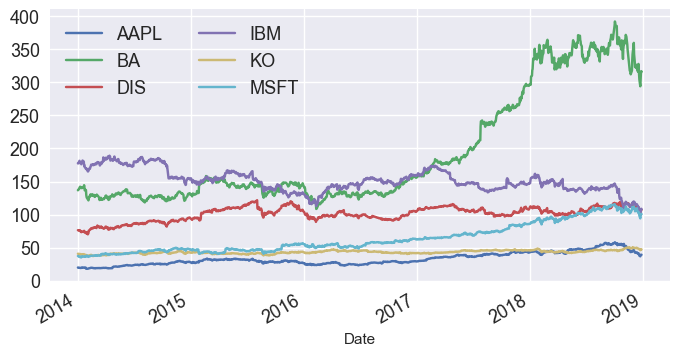

In [17]:
import seaborn as sns

close = stocks.loc[:, "Close"].copy()
close.head()
close.plot(figsize = (8,4), fontsize = 13)
plt.legend(fontsize=13, ncol=2)
plt.show()

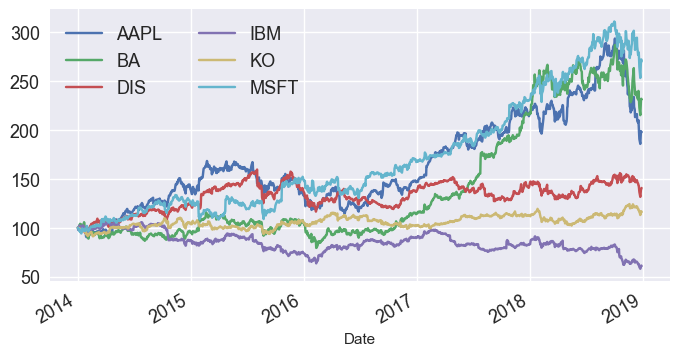

In [18]:
# Normalising the data series
norm = close.div(close.iloc[0]).mul(100)
norm.plot(figsize = (8,4), fontsize = 13)
plt.legend(fontsize = 13, ncol=2)
plt.show()

## 📈 Step 2: Calculate Daily Returns

We now convert the price data into daily percentage returns, which are necessary for portfolio analysis.

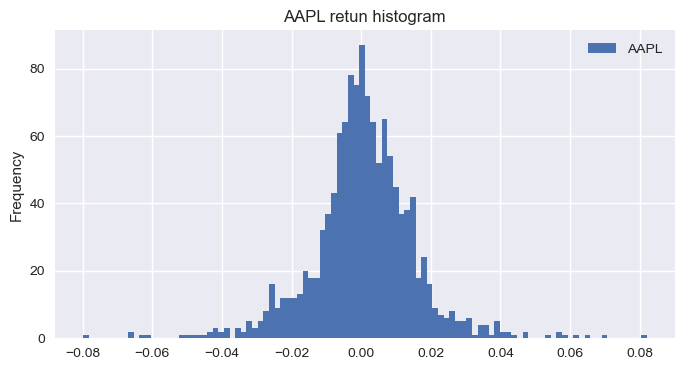

In [19]:
aapl = close.AAPL.copy().to_frame()
ret = aapl.pct_change().dropna()
ret.plot(kind = "hist", figsize = (8,4), bins = 100)
plt.title("AAPL retun histogram")
plt.show()

In [20]:
appl_mean = ret.mean()
appl_std = np.sqrt(ret.var()) 

In [21]:
ret = close.pct_change().dropna()
summary = ret.describe().T.loc[:,["mean","std"]]
# Annualise
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)
summary

,mean,std
Ticker,,
AAPL,0.165478,0.239514
BA,0.195869,0.234048
DIS,0.086376,0.188818
IBM,-0.079275,0.200160
KO,0.039464,0.137876
MSFT,0.226253,0.231876


## Maximising Return per Risk, Market portfolio

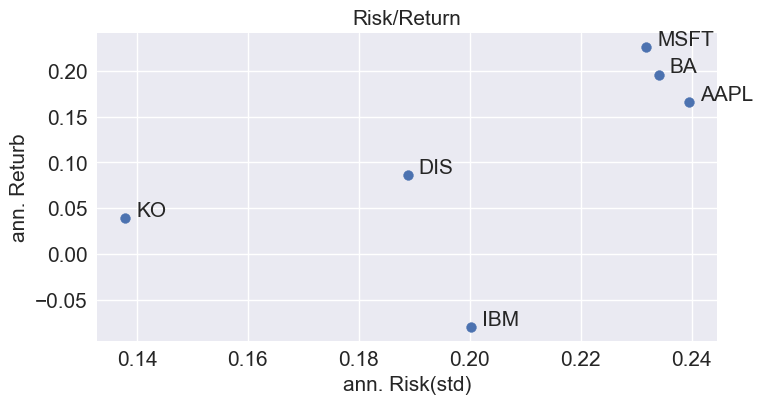

In [22]:
summary.plot.scatter(x = "std", y = "mean", figsize = (8,4), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, "std"]+0.002, summary.loc[i,"mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Returb", fontsize = 15)
plt.title("Risk/Return", fontsize = 15)
plt.show()

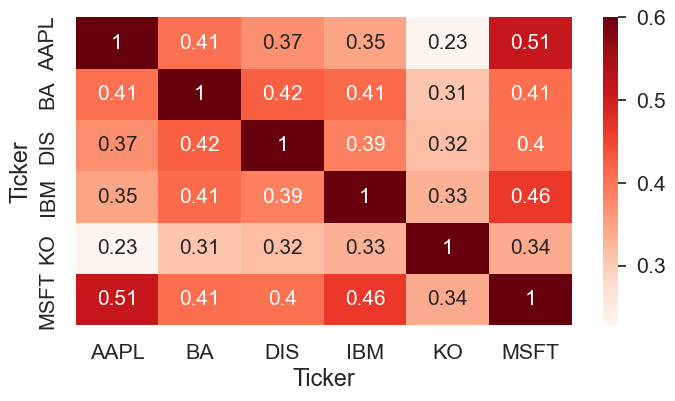

In [23]:
plt.figure(figsize = (8,4))
sns.set(font_scale = 1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws = {"size":15}, vmax = 0.6)
plt.show()

In [26]:
stocks_aclose = stocks["Adj Close"].copy()
ret_a = stocks_aclose.pct_change().dropna()
no_assets = len(stocks_aclose.columns)

In [27]:
stocks_aclose.head()

Ticker,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,17.192825,116.807953,69.041542,111.020966,28.312571,30.939625
2014-01-03,16.815166,117.619873,68.896713,111.685135,28.173317,30.731457
2014-01-06,16.906866,118.295097,68.634193,111.302216,28.041012,30.082037
2014-01-07,16.785948,120.089867,69.104912,113.522270,28.124567,30.315166
2014-01-08,16.892250,120.354843,68.091049,112.481049,27.811224,29.773968


In [28]:
weights = [1/no_assets for i in range(no_assets)]
ret_a["WP"] = ret.mul(weights, axis = "columns").sum(axis = 1) 
ret_a.head()

Ticker,AAPL,BA,DIS,IBM,KO,MSFT,WP
Date,,,,,,,
2014-01-03,-0.021966,0.006951,-0.002098,0.005982,-0.004918,-0.006728,-0.003796
2014-01-06,0.005453,0.005741,-0.003810,-0.003429,-0.004696,-0.021132,-0.003646
2014-01-07,-0.007152,0.015172,0.006858,0.019946,0.002980,0.007750,0.007592
2014-01-08,0.006333,0.002206,-0.014671,-0.009172,-0.011141,-0.017852,-0.007383
2014-01-09,-0.012770,0.009303,-0.004254,-0.003139,-0.005258,-0.006431,-0.003758


In [29]:
summary = ret_a.agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary.Return = summary.Return*252 
summary.Risk = summary.Risk*np.sqrt(252) 
summary.head(10)

,Return,Risk
Ticker,,
AAPL,0.183614,0.239308
BA,0.221393,0.233029
DIS,0.100595,0.188781
IBM,-0.044192,0.199262
KO,0.071689,0.136811
MSFT,0.250354,0.231735
WP,0.105694,0.144408


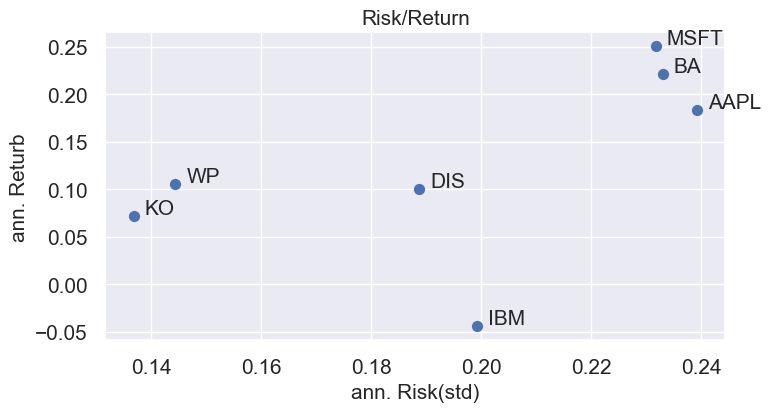

In [30]:
summary.plot.scatter(x = "Risk", y = "Return", figsize = (8,4), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, "Risk"]+0.002, summary.loc[i,"Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Returb", fontsize = 15)
plt.title("Risk/Return", fontsize = 15)
plt.show()

## 🧪 Step 3: Simulate Random Portfolios

We will generate thousands of random portfolios using different asset weights, compute their expected return, risk (standard deviation), and Sharpe ratio.

In [79]:
def ann_risk_return(return_df):
    summary = return_df.agg(["mean","std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252 
    summary.Risk = summary.Risk*np.sqrt(252) 
    return summary

nop = 100000
matrix = np.random.random(nop*no_assets).reshape(nop, no_assets)
weights = matrix / matrix.sum(axis = 1, keepdims = True)
port_ret = ret.dot(weights.T)
port_summary = ann_risk_return(port_ret)

## 📊 Step 4: Visualize Portfolios

Let’s plot all simulated portfolios in risk-return space. Color indicates the Sharpe ratio.

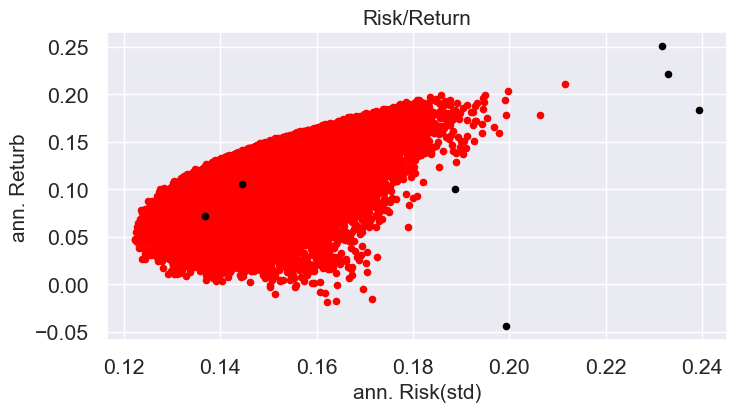

,Return,Risk
count,100000.000000,100000.000000
mean,0.105826,0.149160
std,0.026768,0.009487
min,-0.018856,0.122263
25%,0.088058,0.142204
50%,0.105951,0.148325
75%,0.124115,0.155444
max,0.210562,0.211486


In [81]:
plt.figure(figsize = (8,4))
plt.scatter(port_summary["Risk"], port_summary["Return"], s = 20, color = "red")
plt.scatter(summary["Risk"], summary["Return"], s = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Returb", fontsize = 15)
plt.title("Risk/Return", fontsize = 15)
plt.show()
port_summary.describe()

## 🏆 Step 5: Identify the Market Portfolio

We define the **market portfolio** as the one with the **highest Sharpe ratio** — this is the point where the **Capital Market Line (CML)** is tangent to the **efficient frontier** of risky portfolios.

The Sharpe ratio is calculated as:

$\text{Sharpe Ratio} = \frac{\text{Portfolio Return} - \text{Risk-Free Rate}}{\text{Portfolio Risk}}$

In this notebook, we assume the risk-free rate is zero for simplicity.

Return    0.199527
Risk      0.185833
Sharpe    0.982213
TAN       1.073693
Name: 13594, dtype: float64


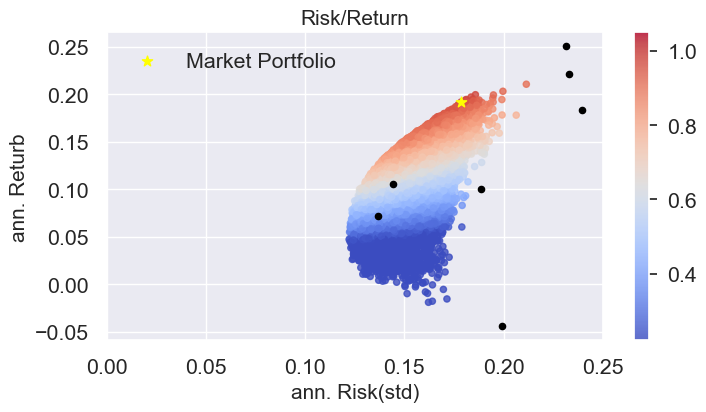

              Return           Risk         Sharpe            TAN
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.105826       0.149160       0.591298       0.705723
std         0.026768       0.009487       0.159688       0.156831
min        -0.018856       0.122263      -0.221097      -0.116270
25%         0.088058       0.142204       0.488596       0.605269
50%         0.105951       0.148325       0.600041       0.714920
75%         0.124115       0.155444       0.709658       0.822653
max         0.210562       0.211486       0.982213       1.074247
Market Portfolio weights
Ticker
AAPL    0.121047
BA      0.453800
DIS     0.024633
IBM     0.002470
KO      0.007390
MSFT    0.390660
dtype: float64


In [86]:
# SharpeRatio = (PortReturn - RFR) / PrtRisk, e.g. risk premium
# RFR are approximatly German bonds
risk_free_retun = 0.017
risk_free_risk = 0
summary["Sharpe"] = (summary["Return"].sub(risk_free_retun))/summary["Risk"]
port_summary["Sharpe"] = (port_summary["Return"].sub(risk_free_retun))/port_summary["Risk"]
port_summary["TAN"] = port_summary["Return"]/port_summary["Risk"]

# Max Sharpe portfolio
msrp = port_summary.Sharpe.idxmax()
print(port_summary.iloc[msrp])
max_tan = port_summary.TAN.idxmax()
Market_Portfolio = pd.Series(index = ret.columns, data = weights[msrp,:])
Market_Portfolio_summary = port_summary.iloc[msrp]

plt.figure(figsize = (8,4))
plt.scatter(
    port_summary["Risk"],
    port_summary["Return"],
    s=20,
    c=port_summary["Sharpe"],       # color by Sharpe
    cmap="coolwarm",                # corrected name from "colorwarm"
    vmin=0.22,
    vmax=1.05,
    alpha=0.8
)
plt.colorbar()
plt.scatter(summary["Risk"], summary["Return"], s = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Returb", fontsize = 15)
plt.title("Risk/Return", fontsize = 15)
plt.xlim([0, 0.25])

plt.scatter(port_summary.iloc[max_tan].Risk,
    port_summary.iloc[max_tan].Return,
    s=60,
    c='yellow',
    marker = "*",label = 'Market Portfolio')
plt.legend()
plt.show()
print(port_summary.describe())
print("\033[1mMarket Portfolio weights\033[0m")
print(Market_Portfolio)

In [34]:
COV = ret.cov()*252
summary["Systematic risk"] = COV.iloc[:,-1]
summary["UnSystematic risk"] = summary["Risk"].sub(summary["Systematic risk"])
summary

,Return,Risk,Sharpe,Systematic risk,UnSystematic risk
Ticker,,,,,
AAPL,0.183614,0.239308,0.696233,0.028483,0.210825
BA,0.221393,0.233029,0.877115,0.022219,0.210810
DIS,0.100595,0.188781,0.442816,0.017707,0.171074
IBM,-0.044192,0.199262,-0.307095,0.021566,0.177696
KO,0.071689,0.136811,0.399737,0.010873,0.125938
MSFT,0.250354,0.231735,1.006988,0.053767,0.177968
WP,0.105694,0.144408,0.614190,NaN,NaN


## 🔁 Step 6: Compare AAPL to the Market

We'll now regress AAPL’s returns against the market portfolio to estimate **beta** and **alpha**, which represent risk sensitivity and abnormal return, respectively.

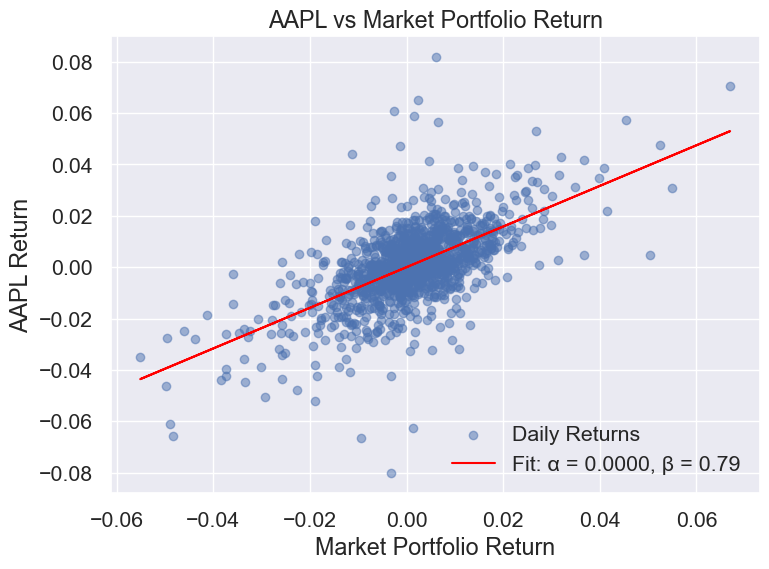

In [71]:
from sklearn.linear_model import LinearRegression

# Step 1: Compute market portfolio return
market_return = ret.dot(Market_Portfolio)

# Step 2: Get AAPL return
aapl_return = ret["AAPL"]

# Step 3: Scatterplot and regression
plt.figure(figsize=(8, 6))
plt.scatter(market_return, aapl_return, alpha=0.5, label="Daily Returns")

# Linear regression
model = LinearRegression()
X = market_return.values.reshape(-1, 1)
y = aapl_return.values
model.fit(X, y)

# Regression line
predicted = model.predict(X)
alpha = model.intercept_
beta = model.coef_[0]
plt.plot(market_return, predicted, color="red", label=f"Fit: α = {alpha:.4f}, β = {beta:.2f}")

# Labels and legend
plt.xlabel("Market Portfolio Return")
plt.ylabel("AAPL Return")
plt.title("AAPL vs Market Portfolio Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📘 Step 7: Fama-French 3-Factor Regression

To better explain AAPL’s performance, we use the Fama-French model, which adds size (SMB) and value (HML) factors alongside the market factor.

This helps identify deeper sources of return variation beyond the market alone.

C:\Users\Oles\AppData\Local\Temp\ipykernel_32124\3125518642.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factors = web.DataReader('F-F_Research_Data_Factors_Daily', 'famafrench', start, end)[0]


β_Mkt-RF = 1.0768
β_SMB = -0.3022
β_HML = -0.5811
α = 0.0190


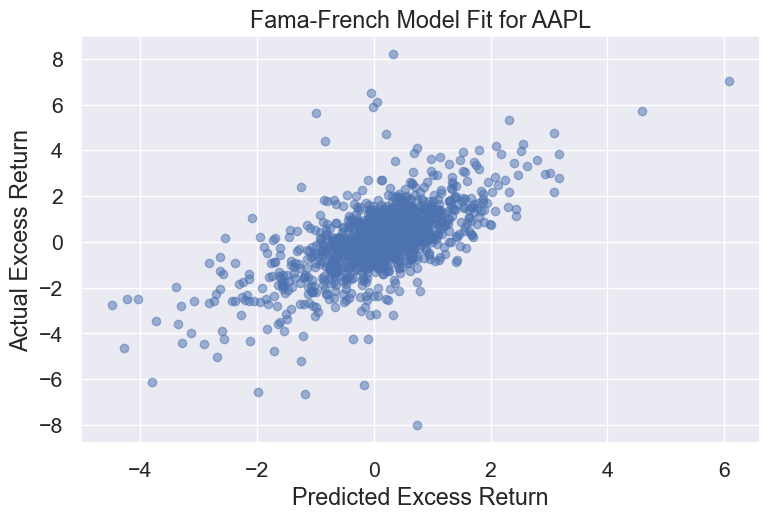

In [84]:
import pandas_datareader.data as web

# 1. Load AAPL and Fama-French factors
start = "2014-01-01"
end = "2018-12-31"

# Daily Fama-French 3 factors (U.S.)
ff_factors = web.DataReader('F-F_Research_Data_Factors_Daily', 'famafrench', start, end)[0]
ff_factors.index = pd.to_datetime(ff_factors.index)

# 2. Load AAPL prices and compute daily returns
aapl = stocks.loc[:, "Close"].AAPL
aapl_ret = ret["AAPL"] * 100  # match % scale of FF data

# 3. Align and merge
df = pd.DataFrame({"AAPL": aapl_ret})
df = df.join(ff_factors, how="inner")

# 4. Prepare regression variables
X = df[["Mkt-RF", "SMB", "HML"]]  # independent variables
y = df["AAPL"] - df["RF"]         # excess return of AAPL

# 5. Fit regression
model = LinearRegression()
model.fit(X, y)

# 6. Output
alpha = model.intercept_
betas = model.coef_
columns = ["Mkt-RF", "SMB", "HML"]
for factor, coef in zip(columns, betas):
    print(f"β_{factor} = {coef:.4f}")
print(f"α = {alpha:.4f}")

predicted = model.predict(X)

plt.scatter(predicted, y, alpha=0.5)
plt.xlabel("Predicted Excess Return")
plt.ylabel("Actual Excess Return")
plt.title("Fama-French Model Fit for AAPL")
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Summary

In this notebook, we learned how to:

- Download and prepare stock data using `yfinance`
- Calculate return and risk for simulated portfolios
- Identify the optimal market portfolio
- Evaluate stock performance with linear regression
- Use the Fama-French model for more advanced factor analysis